In [4]:
import sys
import os
sys.path.append('/home/tpopova/prj/polymer_brush')


from py_utils.annealing_brush import annealing_anion
from py_utils.quenched_brush import quecnhed_br

import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
from mpl_toolkits.mplot3d.proj3d import proj_transform
from matplotlib.text import Annotation
class Annotation3D(Annotation):

    def __init__(self, text, xyz, *args, **kwargs):
        super().__init__(text, xy=(0, 0), *args, **kwargs)
        self._xyz = xyz

    def draw(self, renderer):
        x2, y2, z2 = proj_transform(*self._xyz, self.axes.M)
        self.xy = (x2, y2)
        super().draw(renderer)

def _annotate3D(ax, text, xyz, *args, **kwargs):
    '''Add anotation `text` to an `Axes3d` instance.'''

    annotation = Annotation3D(text, xyz, *args, **kwargs)
    ax.add_artist(annotation)

setattr(Axes3D, 'annotate3D', _annotate3D)

In [5]:
#ПАРАМЕТРЫ
N = 400
S = 100
Cs = 0.001

pK_brush = 5
pK_minus = 5
pK_plus = 9
# f_plus = 0.4778
f_plus = 0.2

# delta_pK_brush = -0.15

выбрать случай pK_brush=pI, pK_brush=pK_-
и показать, как при измении pH около pK_brush=pI  меняется и средний заряд щетки и заряд белка.

/home/tpopova/prj/polymer_brush/py_utils/annealing_brush.py:75: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return -1*(alpha_b**2 * integrate.quad(lambda t: (1 - (1 - alpha_h) * (1 + 2*alpha_b*t**2) * np.exp(alpha_b * (h**2 - t**2)))/(1 \
/home/tpopova/prj/polymer_brush/py_utils/annealing_brush.py:76: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  - (1 -alpha_h) * np.exp(alpha_b * (h**2 - t**2)))**3, 0, h)[0] + ((K * H_0)**2 * alpha_b)/(4) * integrate.quad(lambda t:\
/home/tpopova/prj/polymer_brush/py_utils/annealing_brush.py:75: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return -1*(alpha_b**2 * integrate.quad(lambda t: (1 - (1 - alpha_h) * (1 + 2*alpha_b*t**2) * np.exp(alpha_b * (h**2 - t**2)))/(1 \
/home/tpopova/prj/polymer_brush/py_utils/annealing_brush.py:76: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is as

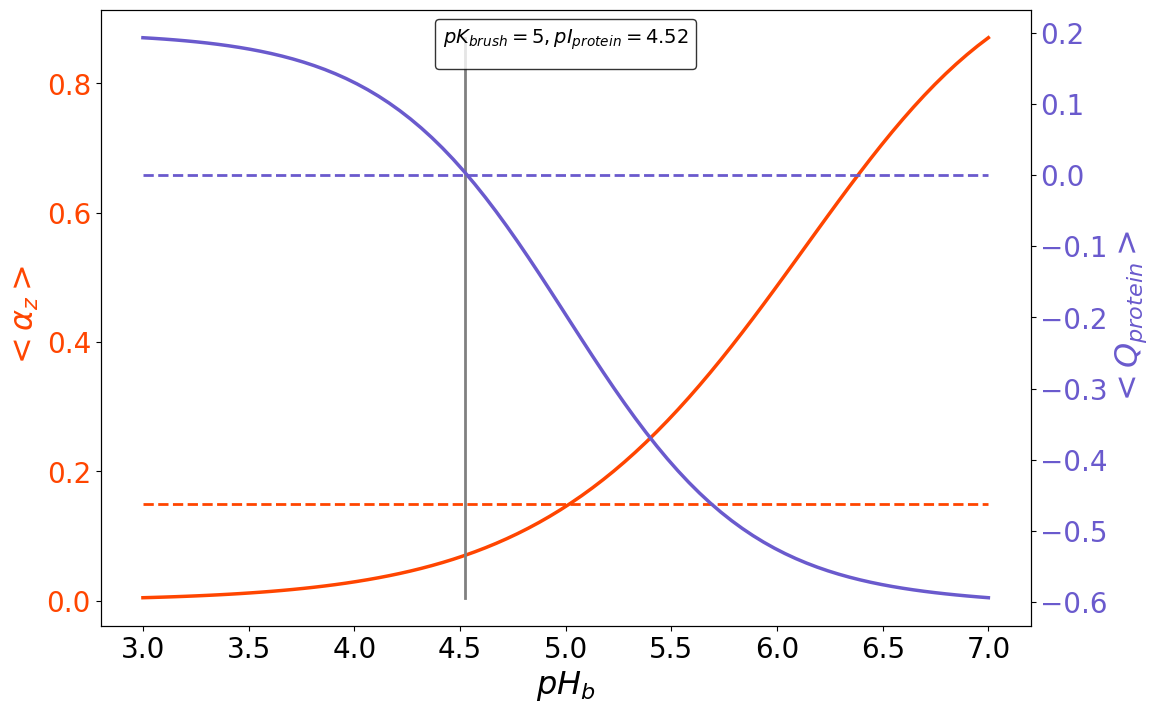

In [6]:
delta_pK_brush = np.linspace(2, -2, num = 80)
color_alpha = 'orangered'
color_protein = 'slateblue'

fig, ax1 = plt.subplots()

alpha_brush_mean, Q_protein_mean, PHB = [], [], []
for delt_pK in delta_pK_brush:
        H, alpha_H, tlambda, K, alpha_z_mean,alpha_z,alpha_b, \
            delta_pK, pH_b, pH_iep,pH_sfbox, delta_pH_b, \
            z_in_range, z_out_range,psi_in, psi_out, f_ion_in, f_ion_out, charge_in, charge_out,\
            polymer_dens_anneal, \
            f_ion_SCF, charge_SCF, parse_SCF_psi, parse_SCF_phi, Q_mean = annealing_anion(
        N = N, 
        S = S,
        Cs = Cs,
        delta_pK = delt_pK, #Отступ от ИЭТ белка
        pK = pK_brush,

        #Параметры белка
        f_plus = f_plus, #доля заряженных групп на поверхности
        pK_plus = pK_plus,
        pK_minus = pK_minus, 
        file_name = 'annealing_brush_temp.pro', 
        way = '/home/tpopova/prj/polymer_brush/Free_energy_SCF/SCF_scripts/output/')
            
        alpha_brush_mean.append(alpha_z_mean)
        Q_protein_mean.append(Q_mean)
        PHB.append(pH_b)

ax1.plot(PHB, alpha_brush_mean, linestyle = '-',
        linewidth = 2.5, color=color_alpha)

ax1.plot(PHB, [0.15]*len(PHB), linestyle = '--',
        linewidth = 2, color=color_alpha)

ax1.plot([pH_iep]*len(alpha_brush_mean), alpha_brush_mean, linestyle = '-',
        linewidth = 2, color='grey')

ax2 = ax1.twinx()


ax2.plot(PHB, Q_protein_mean, linestyle = '-',
        linewidth = 2.5, color=color_protein)

ax2.plot(PHB, [0]*len(PHB), linestyle = '--',
        linewidth = 2, color=color_protein)

# ax1.arrow(pH_iep, 0.09, 0, -0.04,
#                width=0.04,
#                head_length=0.04,
#                edgecolor = 'black',
#                linestyle = '--',
#                facecolor = 'white')


ax1.set_xlabel('$pH_b$', fontsize = 23)
ax1.set_ylabel('$<\\alpha_z>$', color=color_alpha, fontsize = 23)
ax2.set_ylabel('$<Q_{protein}>$', color=color_protein, fontsize = 23)

ax1.tick_params(axis='y', labelcolor=color_alpha)
ax2.tick_params(axis='y', labelcolor=color_protein)

ax1.legend(title = f'$pK_{{brush}} = {pK_brush}, pI_{{protein}} = {round(pH_iep, 2)}$',
    fontsize = 14, 
        ncol = 1, 
        facecolor = 'white', 
        edgecolor = 'black', 
        title_fontsize = '14', 
        loc = 'upper center')

fig.set_figwidth(12)
fig.set_figheight(8)

plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20

save = fig.savefig('charge_brush_protein.pdf', dpi = 200)

найти такое pH, при котором средний заряд щетки будет равен 0.5.
Это значение pH (  pK_brush_ эффективное ) будет несколько выше, чем pK_brush. И затем так подобрать
f_+, чтобы pI= pK_brush_ эффективное.

Тогда при pH= pK_brush_ эффективное  заряд щетки будет 0.5, а заряд белка ноль